# Data from these animals are funky. NaN littered throughout some early tbs. No idea why, but don't trust as is

### The function for correcting the timestamps between arduino and prairie view was incorrect. Fixed and reran preprocessing and things seem to be ok now

In [29]:
### from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)


Toggle code

In [30]:
# all modules necessary for this nb
import os
import sys
import pickle

import numpy as np
import pylab as pl
import scipy.stats as sstats

# setting parameters for default matplotlib plots
%matplotlib inline

In [31]:
pl.style.use('fabiostyle')
# needs to find the library of functions
sys.path.append('../../code/')  # to be replaced!

import utils as ut
import plots as pt

In [32]:
# %%javascript
# var nb = IPython.notebook;
# var kernel = IPython.notebook.kernel;
# var command = "NOTEBOOK_NAME = '" + nb.base_url + nb.notebook_path + "'";
# kernel.execute(command);

In [33]:
# NOTEBOOK_NAME = NOTEBOOK_NAME.split('/')[-1][:-6]
NOTEBOOK_NAME = 'decoding_around_onset_combined_0.5sec_vhpc_beta_exlucded_animals'

In [34]:
from pickleshare import PickleShareDB

autorestore_folder = os.path.join(os.getcwd(), 'autorestore', NOTEBOOK_NAME)
db = PickleShareDB(autorestore_folder)
import sys
from workspace import *
import IPython
ip = IPython.get_ipython()

# this will restore all the saved variables. ignore the errors listed.
load_workspace(ip, db)

# use `save_worspace(db)` to save variables at the end

In [35]:
from itertools import product
def load_all_animals_vars(varname, animal_list, pilot_list=None, notebook='preprocessing'):
    all_of_them = {}
    for ani in animal_list:
        folder = '../%s/notebooks/autorestore/%s/' % (ani, notebook)
        all_of_them.update({ani: ut.load_variable(varname, folder)})
    return all_of_them

In [36]:
post_animals = '90','90_475','91','93_500','93_580','93_720','93_810','c3m1', 'c3m2', 'c3f3', 'c10m6','c10m8'

In [37]:
sessions = 'post',

In [38]:
for sess in 'post',:

    exec("patterns_tb_%s = dict(zip(%s_animals, [ut.load_variable('patterns_tb',\
                                                           '../%%s/%s/notebooks/autorestore/decoding_around_onset_0.5sec/'%%ani)\
                                                  for ani in %s_animals]))"%(sess, sess, sess, sess))
    exec("labels_%s = dict(zip(%s_animals, [ut.load_variable('labels',\
                                                         '../%%s/%s/notebooks/autorestore/decoding_around_onset_0.5sec/'%%ani)\
                                                  for ani in %s_animals]))"%(sess, sess, sess, sess))

In [39]:
#from referenced notebook, 26 time bins total beginning at -4s prior to odor onset and running through 9s post onset

#t_start0 = -4  # sec
#t_stop0 = 10  # sec

In [40]:
#create dict (w/ animals as keys) for each timebin/session combination
for sess in sessions:
    for t in range(0,26):
        exec('patterns_tb_%s_%s = {}'%(t, sess))
        for ani in eval('%s_animals'%sess):
            try:
                print sess,
                print ani,
                exec("patterns_tb_%s_%s['%s'] = patterns_tb_%s['%s'][%s]"%(t,sess,ani,sess,ani,t))
            except IOError as error:
                print error
            continue

post 90 post 90_475 post 91 post 93_500 post 93_580 post 93_720 post 93_810 post c3m1 post c3m2 post c3f3 post c10m6 post c10m8 post 90 post 90_475 post 91 post 93_500 post 93_580 post 93_720 post 93_810 post c3m1 post c3m2 post c3f3 post c10m6 post c10m8 post 90 post 90_475 post 91 post 93_500 post 93_580 post 93_720 post 93_810 post c3m1 post c3m2 post c3f3 post c10m6 post c10m8 post 90 post 90_475 post 91 post 93_500 post 93_580 post 93_720 post 93_810 post c3m1 post c3m2 post c3f3 post c10m6 post c10m8 post 90 post 90_475 post 91 post 93_500 post 93_580 post 93_720 post 93_810 post c3m1 post c3m2 post c3f3 post c10m6 post c10m8 post 90 post 90_475 post 91 post 93_500 post 93_580 post 93_720 post 93_810 post c3m1 post c3m2 post c3f3 post c10m6 post c10m8 post 90 post 90_475 post 91 post 93_500 post 93_580 post 93_720 post 93_810 post c3m1 post c3m2 post c3f3 post c10m6 post c10m8 post 90 post 90_475 post 91 post 93_500 post 93_580 post 93_720 post 93_810 post c3m1 post c3m2 post c3f

In [41]:
import h5py

def combine_train_test_patterns(patterns, labels, train_test_split=0.5, classes=None, n_cells=None,
                                relabel=None, relabel_test=None):
#     which_train = range(90)
#     which_test = range(90)

    if classes is None:
        classes = [0, 1]

    which_train = {}
    which_test = {}
    for ani in patterns.keys():
        which_trains = []
        which_tests = []
        for l in classes:
            if l>=0:
                wt = np.random.permutation(np.where(labels[ani]==l)[0])
                if train_test_split<1:
                    wT = wt[:int(len(wt)*train_test_split)]
                    which_trains.append(wt[int(len(wt)*train_test_split):])
                    which_tests.append(wT)
                else:
                    which_trains.append(wt)
        which_train[ani] = np.concatenate(which_trains)
        if train_test_split<1:
            which_test[ani] = np.concatenate(which_tests)
    
    patterns_t = patterns.copy()
    labels_t = labels.copy()
    for ani in patterns.keys():
        patterns_t[ani] = patterns[ani][which_train[ani]]
        labels_t[ani] = labels[ani][which_train[ani]]
    patterns_comb_train, labels_comb_ = ut.combine_patterns(patterns_t, labels_t, classes=classes)
        
    if train_test_split<1:
        patterns_T = patterns.copy()
        labels_T = labels.copy()
        for ani in patterns.keys():
            patterns_T[ani] = patterns[ani][which_test[ani]]
            labels_T[ani] = labels[ani][which_test[ani]]
        patterns_comb_test, labels_comb_test_ = ut.combine_patterns(patterns_T, labels_T, classes=classes)
    else:
        patterns_comb_test = None
    
    if relabel is not None:
        labels_comb = np.r_[[relabel[l] for l in labels_comb_]]
    else:
        labels_comb = labels_comb_
    
    if relabel_test is not None:
        labels_comb_test = np.r_[[relabel_test[l] for l in labels_comb_test_]]
    else:
        if relabel is not None:
            labels_comb_test = np.r_[[relabel[l] for l in labels_comb_test_]]
        else:
            labels_comb_test = labels_comb_test_
    
    
    if n_cells is None:
        which_cells = [True]*patterns_comb_train.shape[1]
    else:
        which_cells = np.random.permutation(range(patterns_comb_train.shape[1]))[:n_cells]
     
    patterns_comb_train = patterns_comb_train[:, which_cells]
    patterns_comb_test = patterns_comb_test[:, which_cells] if train_test_split<1 else patterns_comb_test

    return (patterns_comb_train[labels_comb>=0], labels_comb[labels_comb>=0],
            patterns_comb_test[labels_comb_test>=0], labels_comb_test[labels_comb_test>=0])
        

def load_cellreg(animal, filename='pre_vs_post.mat', keys=['pre', 'post']):
    with h5py.File('../%s/data/%s'%(animal, filename), 'r') as f:
        g = np.r_[f['cell_registered_struct']['cell_to_index_map']]
        cellreg_dict = {k:g[i][np.where(np.prod([gg>0 for gg in g], 0))[0]].astype(int)-1
                        for i, k in enumerate(keys)}
    return cellreg_dict


In [42]:
from sklearn.model_selection import KFold, LeaveOneOut
from sklearn.svm import SVC

def do_test_within_beta(patterns_train,patterns_test, labels_train, labels_test, relabel=None, n_cells=None):
    
    if relabel is not None:
        labels_train = np.r_[[relabel[l] for l in labels_train]]
        labels_test = np.r_[[relabel[l] for l in labels_test]]
    else:
        labels_train = labels_train
        labels_test = labels_test
    
    if n_cells is None:
        cells = list(range(patterns_train.shape[1]))
    else:
        cells = np.random.choice(range(patterns_train.shape[1]), size=n_cells, replace=False)
    
    decoder.fit(patterns_train[:, cells], labels_train)
    scores = decoder.score(patterns_test[:, cells], labels_test)
    decoder.fit(patterns_test[:, cells], labels_test)
    return np.append(scores, decoder.score(patterns_train[:, cells], labels_train))

In [43]:
decoder = SVC(kernel='linear', decision_function_shape='ovo')

In [44]:
%%time
#get train and test subsamples for each timebin, for each session
for t in range(0,26):
    for sess in sessions:
        exec("x_%s_%s,y_%s_%s, xT_%s_%s, yT_%s_%s = combine_train_test_patterns(patterns_tb_%s_%s, labels_%s,\
        train_test_split=0.5, classes=range(1,5), n_cells=None, relabel=None, relabel_test=None)"%(t,sess,t,sess,t,sess,t,sess,
        t,sess,sess))
        
for t in range(26): # number of time bins
    exec('scores_tb_%s_all = {}'%t)
    n_loops = 30
    for sess in sessions:
        print sess,
        print t,
        eval("scores_tb_%s_all"%t)[sess] = np.r_[[do_test_within_beta(eval('x_%s_%s'%(t,sess)), eval('xT_%s_%s'%(t,sess)), 
                            eval('y_%s_%s'%(t,sess)), eval('yT_%s_%s'%(t,sess)) ,relabel=None) for i in range(n_loops)]]
        #exec("scores_tb_%s['%s'] = np.r_[[do_test_within_beta(x_%s_%s,xT_%s_%s, y_%s_%s, yT_%s_%s, relabel=relabel)]]"%(t,sess,t,sess,t,sess,t,sess,t,sess))

post 0 post 1 post 2 post 3 post 4 post 5 post 6 post 7 post 8 post 9 post 10 post 11 post 12 post 13 post 14 post 15 post 16 post 17 post 18 post 19 post 20 post 21 post 22 post 23 post 24 post 25CPU times: user 3min 14s, sys: 108 ms, total: 3min 14s
Wall time: 3min 14s



In [45]:
#get train and test subsamples for each timebin, for each session
relabel = {1:0,2:1,3:-1,4:-1}
for t in range(0,26):
    for sess in sessions:
        exec("x_%s_%s,y_%s_%s, xT_%s_%s, yT_%s_%s = combine_train_test_patterns(patterns_tb_%s_%s, labels_%s,\
        train_test_split=0.5, classes=range(1,5), n_cells=None, relabel=relabel, relabel_test=None)"%(t,sess,t,sess,t,sess,t,sess,
        t,sess,sess))

#relabel = {1:0,2:1,3:-1,4:-1}
for t in range(26): # number of time bins
    exec('scores_tb_%s_CS1vsCS2 = {}'%t)
    n_loops = 30
    for sess in sessions:
        print sess,
        print t,
        eval("scores_tb_%s_CS1vsCS2"%t)[sess] = np.r_[[do_test_within_beta(eval('x_%s_%s'%(t,sess)), eval('xT_%s_%s'%(t,sess)), 
                            eval('y_%s_%s'%(t,sess)), eval('yT_%s_%s'%(t,sess)) ,relabel=None) for i in range(n_loops)]]
        #exec("scores_tb_%s['%s'] = np.r_[[do_test_within_beta(x_%s_%s,xT_%s_%s, y_%s_%s, yT_%s_%s,\
        #relabel=relabel)]]"%(t,sess,t,sess,t,sess,t,sess,t,sess))

post 0 post 1 post 2 post 3 post 4 post 5 post 6 post 7 post 8 post 9 post 10 post 11 post 12 post 13 post 14 post 15 post 16 post 17 post 18 post 19 post 20 post 21 post 22 post 23 post 24 post 25


In [46]:
%%time
relabel = {1:0,2:0,3:1,4:1}
for t in range(0,26):
    for sess in sessions:
        exec("x_%s_%s,y_%s_%s, xT_%s_%s, yT_%s_%s = combine_train_test_patterns(patterns_tb_%s_%s, labels_%s,\
        train_test_split=0.5, classes=range(1,5), n_cells=None, relabel=relabel, relabel_test=None)"%(t,sess,t,sess,t,sess,t,sess,
        t,sess,sess))

#now recode labels to comapre specific trials. This is combining both CS+ odors vs both CS- odors
#relabel = {1:0,2:0,3:1,4:1}
for t in range(26): # number of time bins
    exec('scores_tb_%s_CSPvsCSM = {}'%t)
    n_loops = 30
    for sess in sessions:
        print sess,
        print t,
        eval("scores_tb_%s_CSPvsCSM"%t)[sess] = np.r_[[do_test_within_beta(eval('x_%s_%s'%(t,sess)), eval('xT_%s_%s'%(t,sess)), 
                            eval('y_%s_%s'%(t,sess)), eval('yT_%s_%s'%(t,sess)) ,relabel=None) for i in range(n_loops)]]
        #exec("scores_tb_%s['%s'] = np.r_[[do_test_within_beta(x_%s_%s,xT_%s_%s, y_%s_%s, yT_%s_%s, relabel=relabel)]]"%(t,sess,t,sess,t,sess,t,sess,t,sess))

post 0 post 1 post 2 post 3 post 4 post 5 post 6 post 7 post 8 post 9 post 10 post 11 post 12 post 13 post 14 post 15 post 16 post 17 post 18 post 19 post 20 post 21 post 22 post 23 post 24 post 25CPU times: user 1min 54s, sys: 60 ms, total: 1min 54s
Wall time: 1min 54s



In [47]:
%%time
relabel = {1:0,2:-1,3:1,4:-1}
for t in range(0,26):
    for sess in sessions:
        exec("x_%s_%s,y_%s_%s, xT_%s_%s, yT_%s_%s = combine_train_test_patterns(patterns_tb_%s_%s, labels_%s,\
        train_test_split=0.5, classes=range(1,5), n_cells=None, relabel=relabel, relabel_test=None)"%(t,sess,t,sess,t,sess,t,sess,
        t,sess,sess))
        
for t in range(26): # number of time bins
    exec('scores_tb_%s_CS1vsCS3 = {}'%t)
    n_loops = 30
    for sess in sessions:
        print sess,
        print t,
        eval("scores_tb_%s_CS1vsCS3"%t)[sess] = np.r_[[do_test_within_beta(eval('x_%s_%s'%(t,sess)), eval('xT_%s_%s'%(t,sess)), 
                            eval('y_%s_%s'%(t,sess)), eval('yT_%s_%s'%(t,sess)) ,relabel=None) for i in range(n_loops)]]
        #exec("scores_tb_%s['%s'] = np.r_[[do_test_within_beta(x_%s_%s,xT_%s_%s, y_%s_%s, yT_%s_%s, relabel=relabel)]]"%(t,sess,t,sess,t,sess,t,sess,t,sess))

post 0 post 1 post 2 post 3 post 4 post 5 post 6 post 7 post 8 post 9 post 10 post 11 post 12 post 13 post 14 post 15 post 16 post 17 post 18 post 19 post 20 post 21 post 22 post 23 post 24 post 25CPU times: user 35.9 s, sys: 40 ms, total: 36 s
Wall time: 35.9 s



In [48]:
%%time
relabel = {1:0,2:-1,3:-1,4:1}
for t in range(0,26):
    for sess in sessions:
        exec("x_%s_%s,y_%s_%s, xT_%s_%s, yT_%s_%s = combine_train_test_patterns(patterns_tb_%s_%s, labels_%s,\
        train_test_split=0.5, classes=range(1,5), n_cells=None, relabel=relabel, relabel_test=None)"%(t,sess,t,sess,t,sess,t,sess,
        t,sess,sess))
        
for t in range(26): # number of time bins
    exec('scores_tb_%s_CS1vsCS4 = {}'%t)
    n_loops = 30
    for sess in sessions:
        print sess,
        print t,
        eval("scores_tb_%s_CS1vsCS4"%t)[sess] = np.r_[[do_test_within_beta(eval('x_%s_%s'%(t,sess)), eval('xT_%s_%s'%(t,sess)), 
                            eval('y_%s_%s'%(t,sess)), eval('yT_%s_%s'%(t,sess)) ,relabel=None) for i in range(n_loops)]]
        #exec("scores_tb_%s['%s'] = np.r_[[do_test_within_beta(x_%s_%s,xT_%s_%s, y_%s_%s, yT_%s_%s, relabel=relabel)]]"%(t,sess,t,sess,t,sess,t,sess,t,sess))

post 0 post 1 post 2 post 3 post 4 post 5 post 6 post 7 post 8 post 9 post 10 post 11 post 12 post 13 post 14 post 15 post 16 post 17 post 18 post 19 post 20 post 21 post 22 post 23 post 24 post 25CPU times: user 34.6 s, sys: 12 ms, total: 34.6 s
Wall time: 34.6 s



In [49]:
%%time
relabel = {1:-1,2:0,3:1,4:-1}
for t in range(0,26):
    for sess in sessions:
        exec("x_%s_%s,y_%s_%s, xT_%s_%s, yT_%s_%s = combine_train_test_patterns(patterns_tb_%s_%s, labels_%s,\
        train_test_split=0.5, classes=range(1,5), n_cells=None, relabel=relabel, relabel_test=None)"%(t,sess,t,sess,t,sess,t,sess,
        t,sess,sess))
        
for t in range(26): # number of time bins
    exec('scores_tb_%s_CS2vsCS3 = {}'%t)
    n_loops = 30
    for sess in sessions:
        print sess,
        print t,
        eval("scores_tb_%s_CS2vsCS3"%t)[sess] = np.r_[[do_test_within_beta(eval('x_%s_%s'%(t,sess)), eval('xT_%s_%s'%(t,sess)), 
                            eval('y_%s_%s'%(t,sess)), eval('yT_%s_%s'%(t,sess)) ,relabel=None) for i in range(n_loops)]]
        #exec("scores_tb_%s['%s'] = np.r_[[do_test_within_beta(x_%s_%s,xT_%s_%s, y_%s_%s, yT_%s_%s, relabel=relabel)]]"%(t,sess,t,sess,t,sess,t,sess,t,sess))

post 0 post 1 post 2 post 3 post 4 post 5 post 6 post 7 post 8 post 9 post 10 post 11 post 12 post 13 post 14 post 15 post 16 post 17 post 18 post 19 post 20 post 21 post 22 post 23 post 24 post 25CPU times: user 35.3 s, sys: 20 ms, total: 35.3 s
Wall time: 35.2 s



In [50]:
%%time
relabel = {1:-1,2:0,3:-1,4:1}
for t in range(0,26):
    for sess in sessions:
        exec("x_%s_%s,y_%s_%s, xT_%s_%s, yT_%s_%s = combine_train_test_patterns(patterns_tb_%s_%s, labels_%s,\
        train_test_split=0.5, classes=range(1,5), n_cells=None, relabel=relabel, relabel_test=None)"%(t,sess,t,sess,t,sess,t,sess,
        t,sess,sess))
        
for t in range(26): # number of time bins
    exec('scores_tb_%s_CS2vsCS4 = {}'%t)
    n_loops = 30
    for sess in sessions:
        print sess,
        print t,
        eval("scores_tb_%s_CS2vsCS4"%t)[sess] = np.r_[[do_test_within_beta(eval('x_%s_%s'%(t,sess)), eval('xT_%s_%s'%(t,sess)), 
                            eval('y_%s_%s'%(t,sess)), eval('yT_%s_%s'%(t,sess)) ,relabel=None) for i in range(n_loops)]]
        #exec("scores_tb_%s['%s'] = np.r_[[do_test_within_beta(x_%s_%s,xT_%s_%s, y_%s_%s, yT_%s_%s, relabel=relabel)]]"%(t,sess,t,sess,t,sess,t,sess,t,sess))

post 0 post 1 post 2 post 3 post 4 post 5 post 6 post 7 post 8 post 9 post 10 post 11 post 12 post 13 post 14 post 15 post 16 post 17 post 18 post 19 post 20 post 21 post 22 post 23 post 24 post 25CPU times: user 36.2 s, sys: 24 ms, total: 36.3 s
Wall time: 36.2 s



In [51]:
%%time
relabel = {1:-1,2:-1,3:0,4:1}
for t in range(0,26):
    for sess in sessions:
        exec("x_%s_%s,y_%s_%s, xT_%s_%s, yT_%s_%s = combine_train_test_patterns(patterns_tb_%s_%s, labels_%s,\
        train_test_split=0.5, classes=range(1,5), n_cells=None, relabel=relabel, relabel_test=None)"%(t,sess,t,sess,t,sess,t,sess,
        t,sess,sess))
        
for t in range(26): # number of time bins
    exec('scores_tb_%s_CS3vsCS4 = {}'%t)
    n_loops = 30
    for sess in sessions:
        print sess,
        print t,
        eval("scores_tb_%s_CS3vsCS4"%t)[sess] = np.r_[[do_test_within_beta(eval('x_%s_%s'%(t,sess)), eval('xT_%s_%s'%(t,sess)), 
                            eval('y_%s_%s'%(t,sess)), eval('yT_%s_%s'%(t,sess)) ,relabel=None) for i in range(n_loops)]]
        #exec("scores_tb_%s['%s'] = np.r_[[do_test_within_beta(x_%s_%s,xT_%s_%s, y_%s_%s, yT_%s_%s, relabel=relabel)]]"%(t,sess,t,sess,t,sess,t,sess,t,sess))

post 0 post 1 post 2 post 3 post 4 post 5 post 6 post 7 post 8 post 9 post 10 post 11 post 12 post 13 post 14 post 15 post 16 post 17 post 18 post 19 post 20 post 21 post 22 post 23 post 24 post 25CPU times: user 36.9 s, sys: 16 ms, total: 36.9 s
Wall time: 36.8 s



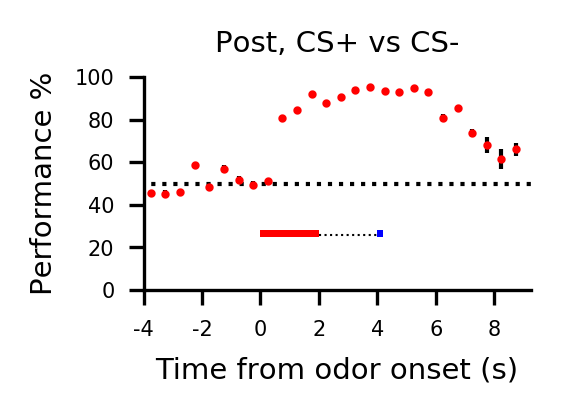

In [55]:
fig, ax = pl.subplots(1,1, figsize=(2, 1.5))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(26):
    ax.plot((t/2.0)-3.75, np.mean(eval("scores_tb_%s_CSPvsCSM['post']"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_%s_CSPvsCSM['post']"%t))*100
    s = np.std(eval("scores_tb_%s_CSPvsCSM['post']"%t))*100 / np.sqrt(eval("scores_tb_%s_CSPvsCSM['post']"%t).shape[-1])
    ax.errorbar((t/2.0)-3.75, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)

ax.set_ylim(0, 100)
ax.set_xlim(-3.75, 9.25)
ax.set_xticks(np.arange(-4,9, 2))
ax.set_xticklabels(np.arange(-4,9, 2))
ax.hlines(50, -6,11, color='k', lw=1, linestyles='dotted')
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('Post, CS+ vs CS-')
fig.tight_layout(pad=2.3)


fig.savefig('../img/%s_CSPvsCSM.jpg'%NOTEBOOK_NAME)

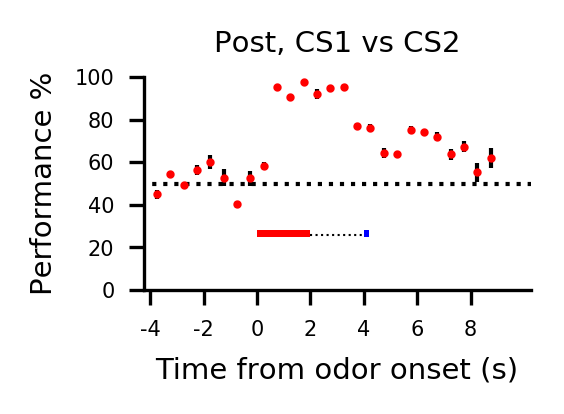

In [56]:
fig, ax = pl.subplots(1,1, figsize=(2, 1.5))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(26):
    ax.plot((t/2.0)-3.75, np.mean(eval("scores_tb_%s_CS1vsCS2['post']"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_%s_CS1vsCS2['post']"%t))*100
    s = np.std(eval("scores_tb_%s_CS1vsCS2['post']"%t))*100 / np.sqrt(eval("scores_tb_%s_CS1vsCS2['post']"%t).shape[-1])
    ax.errorbar((t/2.0)-3.75, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)

ax.set_ylim(0, 100)
ax.set_xlim(-4.25, 10.25)
ax.set_xticks(np.arange(-4,9, 2))
ax.set_xticklabels(np.arange(-4,9, 2))
ax.hlines(50, -6,11, color='k', lw=1, linestyles='dotted')
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('Post, CS1 vs CS2')
fig.tight_layout(pad=2.3)


fig.savefig('../img/%s_CS1vsCS2.jpg'%NOTEBOOK_NAME)

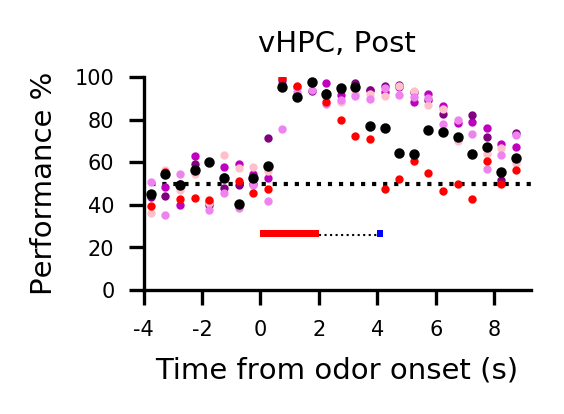

In [57]:
fig, ax = pl.subplots(1,1, figsize=(2, 1.5))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(26):    
    ax.plot((t/2.0)-3.75, np.mean(eval("scores_tb_%s_CS1vsCS3['post']"%t))*100, 'o', color='m', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_%s_CS1vsCS3['post']"%t))*100
    s = np.std(eval("scores_tb_%s_CS1vsCS3['post']"%t))*100 / np.sqrt(eval("scores_tb_%s_CS1vsCS3['post']"%t).shape[-1])
    #ax.errorbar((t/2.0)-3.75, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot((t/2.0)-3.75, np.mean(eval("scores_tb_%s_CS1vsCS4['post']"%t))*100, 'o', color='purple', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_%s_CS1vsCS4['post']"%t))*100
    s = np.std(eval("scores_tb_%s_CS1vsCS4['post']"%t))*100 / np.sqrt(eval("scores_tb_%s_CS1vsCS4['post']"%t).shape[-1])
    #ax.errorbar((t/2.0)-3.75, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot((t/2.0)-3.75, np.mean(eval("scores_tb_%s_CS2vsCS3['post']"%t))*100, 'o', color='pink', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_%s_CS2vsCS3['post']"%t))*100
    s = np.std(eval("scores_tb_%s_CS2vsCS3['post']"%t))*100 / np.sqrt(eval("scores_tb_%s_CS2vsCS3['post']"%t).shape[-1])
    #ax.errorbar((t/2.0)-3.75, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot((t/2.0)-3.75, np.mean(eval("scores_tb_%s_CS2vsCS4['post']"%t))*100, 'o', color='violet', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_%s_CS2vsCS4['post']"%t))*100
    s = np.std(eval("scores_tb_%s_CS2vsCS4['post']"%t))*100 / np.sqrt(eval("scores_tb_%s_CS2vsCS4['post']"%t).shape[-1])
    #ax.errorbar((t/2.0)-3.75, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot((t/2.0)-3.75, np.mean(eval("scores_tb_%s_CS3vsCS4['post']"%t))*100, 'o', color='r', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_%s_CS3vsCS4['post']"%t))*100
    s = np.std(eval("scores_tb_%s_CS3vsCS4['post']"%t))*100 / np.sqrt(eval("scores_tb_%s_CS3vsCS4['post']"%t).shape[-1])
    #ax.errorbar((t/2.0)-3.75, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot((t/2.0)-3.75, np.mean(eval("scores_tb_%s_CS1vsCS2['post']"%t))*100, 'o', color='k', ls='-',lw=.5, zorder=19 ,ms=1,
              markersize=1.5)
    m = np.mean(eval("scores_tb_%s_CS1vsCS2['post']"%t))*100
    s = np.std(eval("scores_tb_%s_CS1vsCS2['post']"%t))*100 / np.sqrt(eval("scores_tb_%s_CS1vsCS2['post']"%t).shape[-1])
    #ax.errorbar((t/2.0)-3.75, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    
ax.set_ylim(0, 100)
ax.set_xlim(-3.75, 9.25)
ax.set_xticks(np.arange(-4,9, 2))
ax.set_xticklabels(np.arange(-4,9, 2))
ax.hlines(50, -6,11, color='k', lw=1, linestyles='dotted')
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('vHPC, Post')
#leg = '1v3','1v4','2v3','2v4','3v4','1v2'
#ax[0].legend(leg, loc='best')
fig.tight_layout(pad=2.3)


fig.savefig('../img/%s_all_combo.jpg'%NOTEBOOK_NAME)

# Only got this far. Have not touched the below

# Now for equalizing cell #s across all sess by using global min

# And now for decoding across time bins!

In [58]:
save_workspace(db)

Could not store variable 'di'. Skipping...
Could not store variable 'IPython'. Skipping...
Could not store variable 'pt'. Skipping...
Could not store variable 'sstats'. Skipping...
Could not store variable 'pl'. Skipping...
Could not store variable 'pickle'. Skipping...
Could not store variable 'ip'. Skipping...
Could not store variable 'sys'. Skipping...
Could not store variable 'h5py'. Skipping...
Could not store variable 'os'. Skipping...
Could not store variable 'ut'. Skipping...
Could not store variable 'np'. Skipping...
